<a href="https://colab.research.google.com/github/FerbeiPatricia/PMP-2024/blob/main/Laborator11_PMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Output()

Output()

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  33.202  2.512  28.350   37.666      0.056    0.039    2047.0    2283.0   
beta1   2.479  0.018   2.445    2.513      0.000    0.000    2503.0    2344.0   
beta2   9.548  0.485   8.678   10.504      0.009    0.006    2820.0    2414.0   
beta3  -3.019  0.195  -3.372   -2.630      0.004    0.003    3059.0    2220.0   
sigma   5.549  0.404   4.867    6.400      0.007    0.005    3328.0    2548.0   

       r_hat  
alpha    1.0  
beta1    1.0  
beta2    1.0  
beta3    1.0  
sigma    1.0  


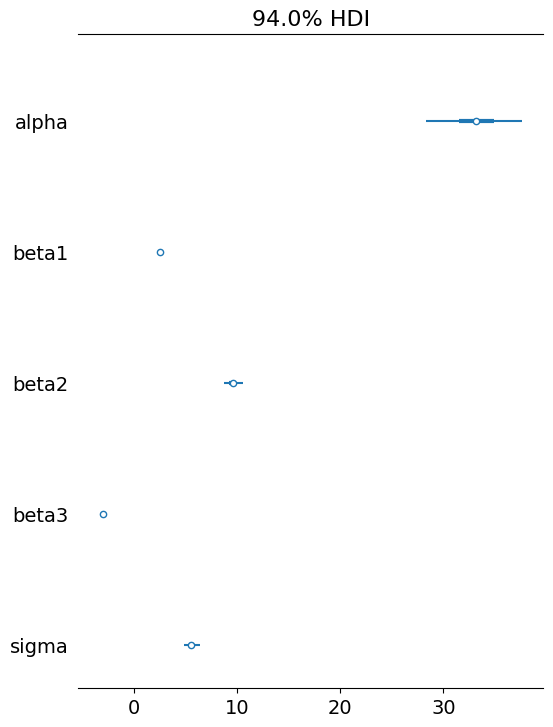

In [18]:
import pandas as pd
import numpy as np
import pymc as pm

#Read the CSV file
df = pd.read_csv('real_estate_data.csv')

#Use 'Speed' and the logarithm of 'HardDrive' as predictors
X = df[['Surface_area', 'Rooms','Distance_to_center']].values
y = df['Price'].values

with pm.Model() as model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    beta3 = pm.Normal('beta3', mu=0, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)

#Linear regression
    mu = alpha + beta1*X[:,0] + beta2*X[:,1] + beta3*X[:,2]

#Likelihood
    y_obs = pm.Normal('y', mu=mu, sigma=sigma, observed=y)

#Inference
    idata = pm.sample(2000, return_inferencedata=True)

#Plot the 95% credible intervals
pm.plot_forest(idata, combined=True)

#Print the summary of the model
print(pm.summary(idata))